In [2]:
import pandas as pd
dataset = pd.read_csv("/content/The-Big-List-20231127-Reviews-to-4650.csv", encoding='latin1')

In [3]:
dataset.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5,NaN
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5,NaN
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4650 non-null   int64  
 1   Brand     4650 non-null   object 
 2   Variety   4650 non-null   object 
 3   Style     4650 non-null   object 
 4   Country   4650 non-null   object 
 5   Stars     4648 non-null   object 
 6   T         0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 254.4+ KB


In [5]:
dataset.describe()

,Review #,T
count,4650.000000,0.0
mean,2325.500000,NaN
std,1342.483706,NaN
min,1.000000,NaN
25%,1163.250000,NaN
50%,2325.500000,NaN
75%,3487.750000,NaN
max,4650.000000,NaN


In [6]:
print(dataset['Brand'].value_counts())

Nissin             567
Maruchan           182
Myojo              152
Nongshim           136
Samyang Foods      122
                  ... 
Kiseki Foods         1
Xiuhe                1
Dr. McDougall's      1
Hi-Lai Foods         1
Westbrae             1
Name: Brand, Length: 698, dtype: int64


In [7]:
# 고유값 확인 -> 중복되지 않는 값
dataset.nunique()

Review #    4650
Brand        698
Variety     4325
Style         10
Country       54
Stars         53
T              0
dtype: int64

In [8]:
# 총 데이터셋 4650, 7개의 컬럼

In [9]:
# 결측치 제거
# True = 1 False = 0
print(dataset.isnull().sum()) # null의 갯수가 sum

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          2
T           4650
dtype: int64


In [10]:
# 'Age' 열 삭제
dataset = dataset.drop('T', axis=1)

In [11]:
dataset

,Review #,Brand,Variety,Style,Country,Stars
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5
...,...,...,...,...,...,...
4645,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
4646,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
4647,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
4648,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2


In [12]:
dataset = dataset.dropna()

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 0 to 4649
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  4648 non-null   int64 
 1   Brand     4648 non-null   object
 2   Variety   4648 non-null   object
 3   Style     4648 non-null   object
 4   Country   4648 non-null   object
 5   Stars     4648 non-null   object
dtypes: int64(1), object(5)
memory usage: 254.2+ KB


In [14]:
import matplotlib.pyplot as plt

In [15]:
# 'Stars' 컬럼의 비숫자 값을 NaN으로 변환
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')

<ipython-input-15-1d117be06920>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')


In [16]:
# 문자형을 숫자로 변경하는 방법 1. astype 2. to_numeric
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')

<ipython-input-16-25ddd8b41279>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')


In [17]:
dataset.describe()

,Review #,Stars
count,4648.000000,4635.000000
mean,2324.620267,3.840982
std,1342.096800,6.440785
min,1.000000,0.000000
25%,1162.750000,3.500000
50%,2324.500000,3.750000
75%,3486.250000,4.500000
max,4650.000000,435.000000


In [18]:
# IQR 기반 이상치 제거
Q1 = dataset['Stars'].quantile(0.25)

In [19]:
Q1

3.5

In [20]:
Q3 = dataset['Stars'].quantile(0.75)

In [21]:
Q3

4.5

In [22]:
# IQR 기반 이상치 제거
IQR = Q3 - Q1

In [23]:
# IQR 기반 이상치 제거
Q1 = dataset['Stars'].quantile(0.25)
Q3 = dataset['Stars'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['Stars'] < (Q1 - 1.5 * IQR)) | (dataset['Stars'] > (Q3 + 1.5 * IQR)))]

In [24]:
dataset['Stars']

0       5.0
1       5.0
2       4.5
3       4.5
4       5.0
       ... 
4642    3.0
4644    2.5
4645    3.5
4647    2.0
4648    2.0
Name: Stars, Length: 4358, dtype: float64

In [27]:
# 중복 데이터 확인 - duplicated()
df = pd.DataFrame(dataset)

duplicates_count = df.duplicated().sum()
print(duplicates_count)

0


In [28]:
# 전체 데이터에 대한 중복 제거
df = df.drop_duplicates()

In [29]:
# 특정 컬럼에 대한 중복 제거
# 예: 'Brand' 컬럼 기준 중복 제거
df = df.drop_duplicates(subset=['Brand'])

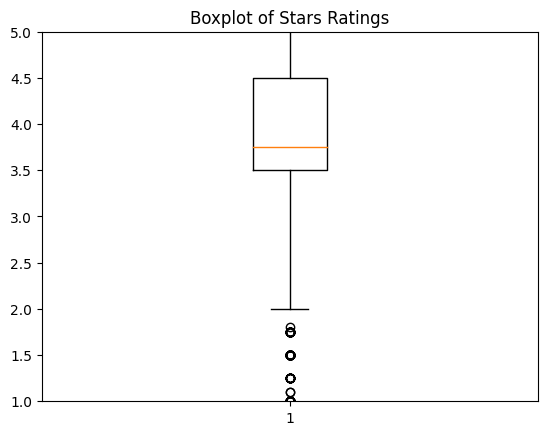

In [30]:
dataset = pd.read_csv('/content/The-Big-List-20231127-Reviews-to-4650.csv', encoding='latin1')  # 인코딩이 필요한 경우 변경

# 'Stars' 컬럼의 비숫자 값을 NaN으로 변환
dataset['Stars'] = pd.to_numeric(dataset['Stars'], errors='coerce')

# NaN 값 제거
dataset = dataset.dropna(subset=['Stars'])

# 'Stars' 컬럼에 대한 박스플롯 생성
plt.boxplot(dataset['Stars'])
plt.title('Boxplot of Stars Ratings')
plt.ylim(1, 5)  # y축 범위를 1에서 5로 설정
plt.show()